# Capstone Project: King County House Price Predictions
# III. Inferential Statistics

## Overview
1. <a href='#Section1'>Review of Storytelling (EDA)</a>
2. <a href='#Section2'>Correlation between house price and independent variables</a>
3. <a href='#Section3'>Correlation between independent variables</a>
4. <a href='#Section4'>Relationship between house price and categorical independent variables</a>
5. <a href='#Section5'>Conclusion</a>
6. <a href='#Section6'>Appendix: zip code 98039</a>

_The dataset was already cleaned and explored in the previous parts of this project. See the Jupyter notebooks for Data wrangling and Storytelling (EDA) in the Capstone project 1 respository for more details._

<a id= 'Section1'></a>

## 1. Review of Storytelling (EDA) part

The main quesiton in the storytelling (EDA) part was "what are the features that can help predicting house prices?". I investigated relationships between features to answer this question. Here are some of the main findings I had. I only included the ones I am going to investigate further using inferential statistics in this notebook.

1. I found many features are correlated to house price. In this notebook, I will find independent variables highly correlated with house price (dependent variable) along with a hypothesis test for correlation (Section 2). 
 
2. I also found many independent variables (features except for price) are highly correlated to each other. I will also find statistical significance of their correlations using a hypothesis test (Section 3)

3. Using boxplots, I found house prices vary across different levels (groups) of some discrete or categorical features. For example, house prices tend to be higher for waterfront houses and houses with the lowest health fitness score (B+). I will check whether the differences are statistically significant using hypothesis tests (Seciont 4)

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import ttest_ind
import matplotlib.image as mpimg

In [33]:
# load data
df = pd.read_csv('df_house_zipcode.csv', index_col=0)
# change data types
df.id = df.id.astype(str)
df.zipcode = df.zipcode.astype(str)
df.date = pd.to_datetime(df.date)

<a id= 'Section2'></a>

## 2. Correlation between house price and independent variables

Since many of my variables are skewed (including house price) or ordinal, I will use the Spearman (or Kendal's tau) correlation instead of the Pearson correlation. The Spearman correlation, unlike the Pearson correlation, does not assume that both datasets have normal distributions.

In [34]:
# Correlation matrix
corr_matrix = df.corr(method ='spearman') #default method is pearson

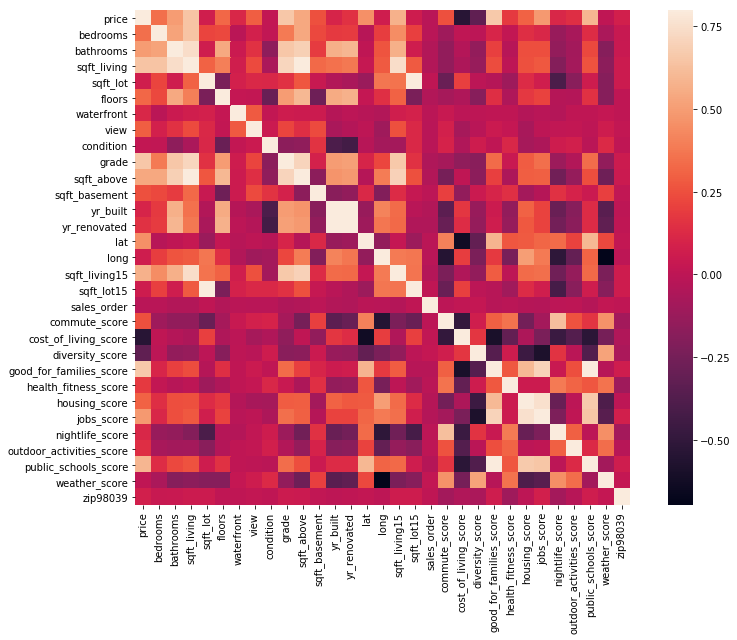

In [35]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
plt.tight_layout() # need for savefig
plt.savefig("corr_heat_map.png",format="png", dpi=300)
plt.show()

This heat map for correlation matrix is slightly different from what I made in the data storytelling part since I used the pearson correlation coefficient in the storytelling part.

In [36]:
# Correlations to price
corr_to_price = corr_matrix['price'].sort_values(ascending=False)
corr_to_price

price                       1.000000
good_for_families_score     0.661782
grade                       0.658150
sqft_living                 0.643992
public_schools_score        0.592873
sqft_living15               0.572265
sqft_above                  0.541562
bathrooms                   0.497297
jobs_score                  0.485692
lat                         0.456125
bedrooms                    0.344176
floors                      0.322480
housing_score               0.304971
view                        0.293910
commute_score               0.255161
sqft_basement               0.251490
health_fitness_score        0.180900
yr_renovated                0.152822
outdoor_activities_score    0.140563
waterfront                  0.115119
nightlife_score             0.114945
yr_built                    0.102058
zip98039                    0.079413
sqft_lot                    0.075073
long                        0.064060
sqft_lot15                  0.063079
condition                   0.017991
w

### Independent variables stronly correlated to  dependent variable (price)

Here I will assume correlation of two variables is strong if the absolute value of their correlation coefficient is higher than or equal to 0.5.

In [37]:
# features stongly correlated to price
corr_high = corr_to_price[(corr_to_price >= 0.5)|(corr_to_price <= -0.5)][1:]
corr_high

good_for_families_score    0.661782
grade                      0.658150
sqft_living                0.643992
public_schools_score       0.592873
sqft_living15              0.572265
sqft_above                 0.541562
cost_of_living_score      -0.533527
Name: price, dtype: float64

- These are the strongly correlated independent variables to the dependent variable, price. 
- They are features related to house locations, square footage and house grade.

In [39]:
# features correlated to price
corr_medium = corr_to_price[(corr_to_price >= 0.3)|(corr_to_price <= -0.3)][1:]
corr_medium

good_for_families_score    0.661782
grade                      0.658150
sqft_living                0.643992
public_schools_score       0.592873
sqft_living15              0.572265
sqft_above                 0.541562
bathrooms                  0.497297
jobs_score                 0.485692
lat                        0.456125
bedrooms                   0.344176
floors                     0.322480
housing_score              0.304971
diversity_score           -0.326577
cost_of_living_score      -0.533527
Name: price, dtype: float64

### Hypothesis test for correlation

I will use the t-test for the population correlation coefficient to check the significance of correlations. Again, I need to use the Spearman (or Kendal's tau) correlation due to skewed or ordinal variables.

- Null hypothesis: the population correlation is zero i.e., r=0
- Alternative hypothesis: the population correlation is not zero (two-sided) i.e., r!=0

reference: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.spearmanr.html

In [250]:
for col in corr_high.index:
    corr, p_val = spearmanr(df[col], df['price'])
    print("Corr:", round(corr,4), "p-val:", p_val, "Price vs.", col)

Corr: 0.6618 p-val: 0.0 Price vs. good_for_families_score
Corr: 0.6582 p-val: 0.0 Price vs. grade
Corr: 0.644 p-val: 0.0 Price vs. sqft_living
Corr: 0.5929 p-val: 0.0 Price vs. public_schools_score
Corr: 0.5723 p-val: 0.0 Price vs. sqft_living15
Corr: 0.5416 p-val: 0.0 Price vs. sqft_above
Corr: -0.5335 p-val: 0.0 Price vs. cost_of_living_score


All correlations are significantly different from zero since the p-values are less than .01, the significance level. Thus, we reject the null hypothesis that two variables have zero correlation. In other words, each of above variable is significantly correlated to house price.  

<a id= 'Section3'></a>

## 3. Correlation between independent variables

Here I will find stronly correlated independent variable pairs. Here I will assume correlation of two variables is strong if the absolute value of their correlation coefficient is higher than or equal to 0.7 since a lower cutoff (like 0.5) output too many pairs of variables. Again, the t-test for the population correlation coefficient (spearman) was used to check the significance of correlations.

In [252]:
# find highly correated indep variable pairs
corr_indep = pd.DataFrame()
for i, col in enumerate(corr_matrix.index):
    for j, idx in enumerate(corr_matrix.index):
        if i > j:
            corr = corr_matrix.loc[idx,col]
            if  (corr >= .7) | (corr <= -.7):
                _, p_val = spearmanr(df[col], df[idx])
                corr_indep.loc[idx+'_vs_'+col, 'corr'] = round(corr,4)
                corr_indep.loc[idx+'_vs_'+col, 'p_val'] = p_val
                
print(corr_indep.sort_values(by=['corr'], ascending=False)) #df.sort() was deprecated

                                                   corr  p_val
sqft_lot_vs_sqft_lot15                           0.9223    0.0
yr_built_vs_yr_renovated                         0.9121    0.0
good_for_families_score_vs_public_schools_score  0.8973    0.0
sqft_living_vs_sqft_above                        0.8433    0.0
housing_score_vs_jobs_score                      0.7584    0.0
sqft_living_vs_sqft_living15                     0.7470    0.0
bathrooms_vs_sqft_living                         0.7459    0.0
sqft_living_vs_grade                             0.7163    0.0
grade_vs_sqft_above                              0.7117    0.0
good_for_families_score_vs_jobs_score            0.7011    0.0


- These are highly correlated (>= 0.7 or <=-0.7) pairs of independent variables and their correlation coefficients are all significantly different from zero (p-value < .01).
- The top three pairs, who have around 0.9 of correlation, are sqft_lot and sqft_lot15, yr_built and yr_renovated, and good_for_families_score and public_schools_score. 
 - The first top pair is expected since lot size of a house usually does not change over time. 
 - The second top pair yr_built and yr_renovated are correlated since I made yr_renovated using yr_built.
 - The third top pair shows good locations for families have good public schools.   
- High correlations between independent variables (multicolinearity) can make a regression model perform worse. Thus, removing some of independent variables that are highly correlated to other independent variables might help. For example, I migth want to remove sqft_above and sqft_living15 from my regression model since they are highly correlated with sqft_living and measuring a similar feature of a house. I keep sqft_living since it has higher correlation to price than the other two. I can further check multicolinearity with Variance Inflation Factor (VIF). However, removing correlated variables is not the only way to handle multicolinearity. I would prefer to add the Pricipal Component Analysis step instead of removing variables for a machine learning model.

<a id= 'Section4'></a>

## 4. Relationship between house price and categorical independent variables

### waterfront vs. price

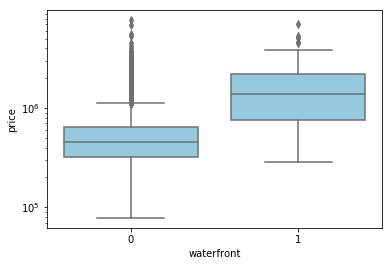

In [171]:
# boxplot for waterfront vs. price (in log scale)
g = sns.boxplot(x='waterfront', y='price', data = df, color="skyblue")
g.set_yscale('log') #needed this due to skewed prices
plt.show()

I found waterfront houses tend to be more expensive than others using a boxplot (above), a scatter plot and a map plot in the storytelling part of this project. Here I will test if prices of waterfront and not waterfront houses are significantly different using a hypothesis test.

In [176]:
def print_result(outputs, title, label_1='test statistic', 
                 label_2='p-value', digits = 4):
    print(title)
    print(label_1, ": ", round(outputs[0],digits))
    print(label_2, ": ", round(outputs[1],digits))

In [174]:
# sample means
price_not_waterfront = df.price[df.waterfront == 0]
price_waterfront = df.price[df.waterfront == 1]
print("Not waterfront")
print("Sample size:", len(price_not_waterfront), "Mean:", round(np.mean(price_not_waterfront)))
print("Waterfront")
print("Sample size:", len(price_waterfront), "Mean:", round(np.mean(price_waterfront)))

Not waterfront
Sample size: 21434 Mean: 531673.0
Waterfront
Sample size: 163 Mean: 1661876.0


Wow, their mean house prices are very different! Let's test this difference is significant.

In [28]:
print('proportion of waterfront houses: {:.2f} %'.format(sum(df.waterfront)/len(df)*100))

proportion of waterfront houses: 0.75 %


In [210]:
# two sample independent t-test (two-sided)
output_t = ttest_ind(price_not_waterfront, price_waterfront, equal_var=False) #Welch’s t-test
print_result(output_t,"two-sample independent t-test", digits=4)

two-sample independent t-test
test statistic :  -12.8746
p-value :  0.0


- I used the two-sample independent t-test (two-sided) to compare the population means for waterfront and not waterfront houses. 
- I used 'equal_var=False' since I do not want to use a test that assumes equal variances due to different sample sizes. If 'equal_var=False' is used, ttest_ind() performs Welch’s t-test, which does not assume equal variance or equal sample size in two populations.
- The p-vluae is closed to zero (less than 0.01), so we reject the null hypothesis that two population means are the same. Therefore, I conclude that waterfront houses are significantly more expensive than not waterfront houses.

### health_fitness_score vs. price and nightlife_score vs. price

Recall that I made some columns about house location using zip codes by scraping Niche.com. The columns originally had grades from D+ to A+, but I tranform the grades to scores for numerical analysis in the data wrangling part of this project. health_fitness_score and nightlife_score were found to have very low correlation with price, but have very different house prices for some levels of scores.  

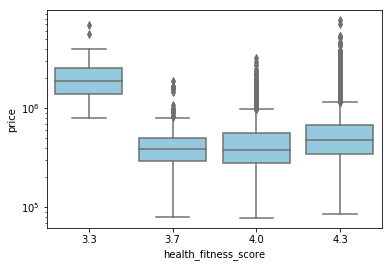

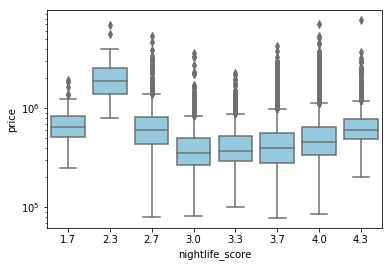

In [203]:
# Price box plots with some categorical features on x-axis 
columns_category = ['health_fitness_score', 'nightlife_score']

for column in columns_category:
    g = sns.boxplot(x=column, y='price', data = df, color="skyblue")
    g.set_yscale('log') #needed this due to skewed prices
    plt.show()

- I found houses with health_fitness_score of 3.3 (B+) and nightlife_score of 2.3 (C+) have much higher prices than others (above). 
- More interestingly I found they are all from the one zip code 98039 and only houses in 98039 had those grades (below).

In [206]:
len(df[df.nightlife_score==2.3]), df[df.nightlife_score==2.3].zipcode.unique()

(50, array(['98039'], dtype=object))

In [207]:
len(df[df.health_fitness_score==3.3]), df[df.health_fitness_score==3.3].zipcode.unique()

(50, array(['98039'], dtype=object))

In [208]:
len(df[df.zipcode=='98039'])

50

I will test if the houses in 98039 are significantly expensive than other houses using a two-sample independent t-test. 

In [212]:
# sample means
price_not_98039 = df.price[df.zipcode != '98039']
price_98039 = df.price[df.zipcode == '98039']
print("Not 98039 houses")
print("Sample size:", len(price_not_98039), "Mean:", round(np.mean(price_not_98039)))
print("98039 houses")
print("Sample size:", len(price_98039), "Mean:", round(np.mean(price_98039)))

Not 98039 houses
Sample size: 21547 Mean: 536443.0
98039 houses
Sample size: 50 Mean: 2160607.0


The mean house price in zip code 98039 is almost 4 times more expensive that the mean house price not in 98039.

In [30]:
print('proportion of 98039 houses: {:.2f} %'.format(sum(df.zipcode == '98039')/len(df)*100))

proportion of 98039 houses: 0.23 %


In [213]:
# two-sample independent t-test (two-sided)
output_t = ttest_ind(price_not_98039, price_98039, equal_var=False)
print_result(output_t,"two-sample independent t-test", digits=4)

two-sample independent t-test
test statistic :  -9.8445
p-value :  0.0


- I used the two-sample independent t-test (two-sided) to compare the population means for houses in 98039 and not in 98039.
- I used 'equal_var=False' again to perform Welch’s t-test, which does not assume equal variance or equal sample size in two populations.
- The p-vluae is closed to zero (less than 0.01), so we reject the null hypothesis that two population means are the same. Therefore, I conclude that the houses in 98039 are significantly more expensive than houses not in 98039.
- Since I found the houses in 98039 are so much more expensive, a new feature, whether a house is in zipcode 98039 or not, could be another good predictor for a house price prediction model!!

#### Making zip98039 column

In [5]:
# Make a new column showing whether a house is in zipcode 98039 or not 
# 1 for houses in 98039 and 0 for else
df['zip98039'] = (df.zipcode == '98039')*1

In [6]:
sum(df.zip98039)

50

In [7]:
# Save the modified DataFrames to csv file
df.to_csv('df_house_zipcode.csv')

#### Are waterfront and zip98039 good predictors?

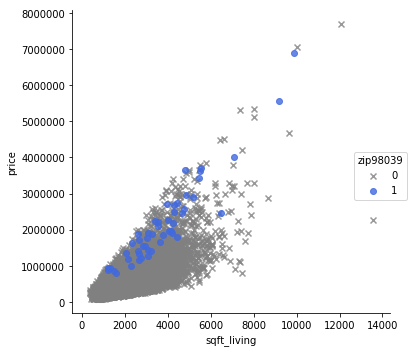

In [11]:
# sqft_living vs price scatter plot colored with zip98039 
sns.lmplot(data = df, x='sqft_living', y='price', hue='zip98039', hue_order=[0,1],
           fit_reg=False, markers=["x", "o"], palette={1:"royalblue", 0:"grey"})
plt.tight_layout() # need for savefig
plt.savefig("price_sqft_living_zip98039.png",format="png", dpi=300)
plt.show()

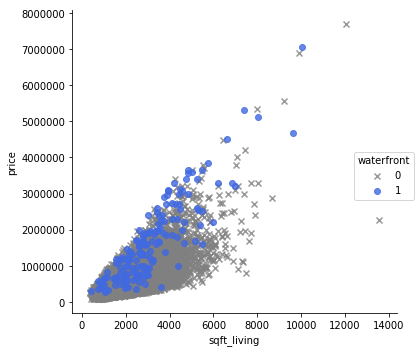

In [32]:
# sqft_living vs price scatter plot colored with waterfront 
sns.lmplot(data = df, x='sqft_living', y='price', hue='waterfront', hue_order=[0,1],
           fit_reg=False, markers=["x", "o"], palette={1:"royalblue", 0:"grey"})
plt.tight_layout() # need for savefig
plt.savefig("price_sqft_living_waterfront.png",format="png", dpi=300)
plt.show()

The categorical features, waterfront and zip98039, can be good predictors for a house price prediction model if they can explain some extra variabilities in house prices. However, if the differences are made just because the houses in waterfront or zip code 98039 have better qualities (e.g. bigger sqft_living), these features will not have importances in a model. The above two plots show waterfront and 98039 houses are more expensive comparing to other houses with similar square footages. However, there still can be other features making the higher prices in those areas. Moreover, the proportions of waterfront and 98039 houses are low (.75% and .23%, respectively), so the features might not have enough powers. We will find out whether these features are indeed useful in a prediction model or not in the machine learning part.  

<a id= 'Section5'></a>

## 5. Conclusion

- For correlation, I used spearman correlation coefficients due to skewed or ordinal variables. Statistical significance of correlation was tested with the t-test for the population correlation coefficients. 

 - I found the variables strongly and significantly correlated to house prices are features related to house locations (good_for_families_score and public_schools_score) or square footage of house (sqft_living, sqft_above, and sqft_living15, but not sqft_basement), and house grade. These will be good predictors for a house price prediction model  if high correlations between independent variables (multicolinearity) is well taken care of.
 
 - Many independent variables are highly and significantly correlated; 10 pairs have correlation over 0.7. The Highly correlated independent variable will be carefully treated in my house prediction models to avoid multicolinearity. 

- A two-sample independent t-test was used to find a significant categorical variable in a house price prediction. I used Welch’s t-test which does not assume equal variance or equal sample size in two populations. I had to use it because the two groups in my categorical variables have very unbalanced sample sizes. 
 - I found waterfront houses are significantly more expensive than not waterfront houses. 
 - I also found houses in zip code 98039 are significantly more expensive than houses not in the zipcode and made a new column zip98039 indicating whether a house is in 98039 or not. 
 - These categorical variables can be good predictors for a house prediction model.

<a id= 'Section6'></a>

## 6. Appendix: zip code 98039

_ I have done some extra analysis here. This section does not have to be graded._

#### Any other zipcode like this?

Now I wonder, are there more zip codes like 98039?  To answer this question I made a boxplot for zipcode vs. price.

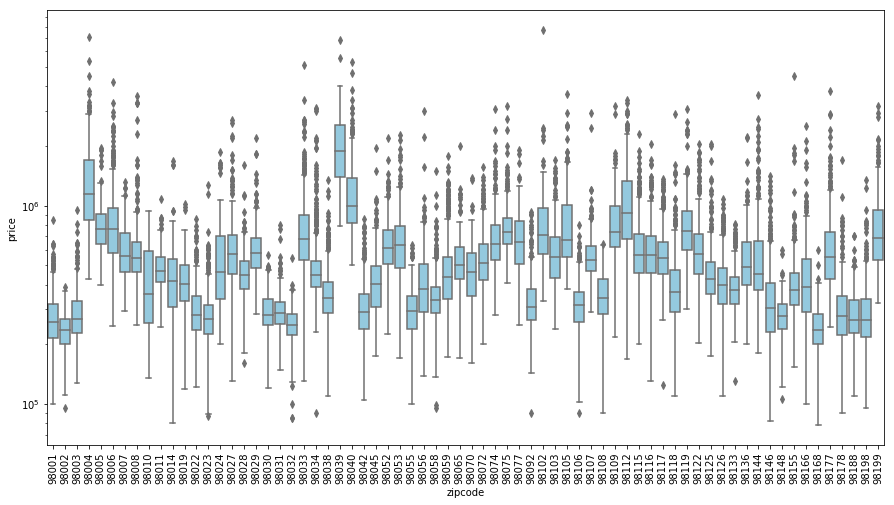

In [241]:
# boxplot for zipcode vs. price (in log scale)
plt.figure(figsize=(15,8))
g = sns.boxplot(x='zipcode', y='price', data = df, color="skyblue")
g.set_yscale('log') #needed this due to skewed prices
plt.xticks(rotation=90)
plt.show()

98039 seems to have the highest house prices, but I will make a boxplot without a log scale for price below to see this pattern better.

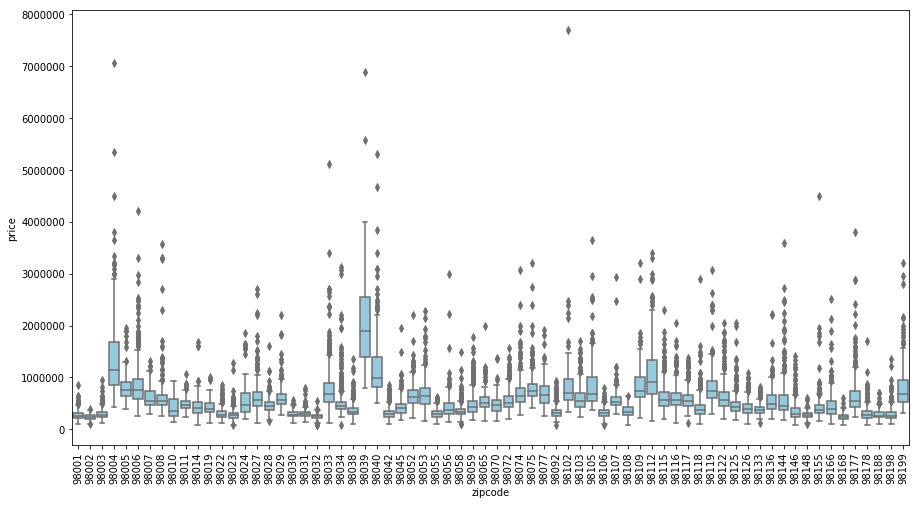

In [240]:
# boxplot for zipcode vs. price (not in log scale)
plt.figure(figsize=(15,8))
g = sns.boxplot(x='zipcode', y='price', data = df, color="skyblue")
#g.set_yscale('log') #needed this due to skewed prices
plt.xticks(rotation=90)
plt.show()

There are some zip codes that have more expensive houses than others, but the house prices in zip code 98039 stand out. 

#### Why houses in 98039 are so much more expensive?

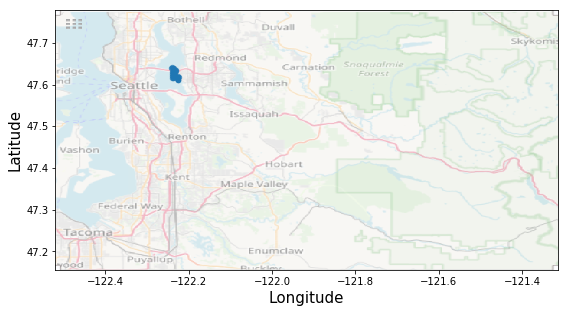

In [216]:
# colored with health_fitness_score
King_County_map = mpimg.imread('King_County_map.png')
long_lat_min_max =[min(df.long), max(df.long), min(df.lat), max(df.lat)]

ax = df[df.zipcode=='98039'].plot(kind='scatter', x='long', y='lat', alpha=0.6,
    figsize=(9,5), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.show()

I found the place with zipcode 98039 is a city called Medina on a peninsula in Lake Washington. This city is where many billionaires like Bill Gates and Jeff Bezos have houses. 

reference: https://en.wikipedia.org/wiki/Medina,_Washington